In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uy = [0,1,2,3,4,5,6,7]
k1 = 20
k2 = 10
u3 = [0,0.5,2.5,5.5,0.0,1.0,3.0,6.0]
k3 = [[0,k1,k1,k1,0,0,0,0],[k1,0,k1,k1,0,0,0,0],[k1,k1,0,k1,0,0,0,0],[k1,k1,k1,0,0,0,0,0],
      [0,0,0,0,0,k2,k2,k2],[0,0,0,0,k2,0,k2,k2],[0,0,0,0,k2,k2,0,k2],[0,0,0,0,k2,k2,k2,0]]

In [7]:
def sol1(u,k): #Print out potential for every single point 
    final = []
    for i in uy:
        add = []
        value = 0
        for j in uy:
            q = abs(j-i)
            if j-i == 1 or i-j == 1: #For the case where there is only 1 spring between 2 points 
                value = 0.5*(k[i][j])*abs(u[j]-u[i])**2.0
                add.append(value)
            elif j-i == 0 : #The case where its the same point 
                add.append(0)
            elif j - i > 1.0: #There is more than 1 spring between the points
                if k[i][j] == 0: #if the point are not connected
                    add.append(0)
                elif k[i][j] != 0: #if the points are connected and this one is going from higher point to the lower point
                    t = 0
                    x = j-1
                    y = j
                    while y > 0:
                        if k[i][y] == 0:
                            y = y - 1
                        pe = ((k[i][y])*(u[y] - u[x])**2.0)/2
                        t = t + pe
                        y = y - 1
                        x = x - 1
                    add.append(t)
                    t = 0
            elif j - i < -1: #This is also when there is more than 1 spring between the point 
                if k[i][j] == 0: #the point are not connected 
                     add.append(0)
                elif k[i][j] != 0: #if the points are connected and this one is going from lower point to the higher point
                    t = 0
                    y = j
                    x = i 
                    jin = j + 1
                    while y < i:
                        pe = ((k[i][j])*(u[j] - u[jin])**2.0)/2
                        t = t + pe
                        j += 1
                        jin += 1
                        y += 1
                    add.append(t)
                    t = 0
        final.append(add) #return a list of potential energy for every i 
    return final 

In [8]:
sol1(u3,k3)

[[0, 2.5, 42.5, 132.5, 0, 0, 0, 0],
 [2.5, 0, 40.0, 130.0, 0, 0, 0, 0],
 [42.5, 40.0, 0, 90.0, 0, 0, 0, 0],
 [132.5, 130.0, 90.0, 0, 0.0, 0, 0, 0],
 [0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0],
 [0, 0, 0, 0, 5.0, 0, 20.0, 65.0],
 [0, 0, 0, 0, 25.0, 20.0, 0, 45.0],
 [0, 0, 0, 0, 70.0, 65.0, 45.0, 0]]

In [10]:
a = np.array([0, 2.5, 42.5, 132.5, 0, 0, 0, 0])
b = np.array([2.5, 0, 40.0, 130.0, 0, 0, 0, 0])
c = np.array([42.5, 40.0, 0, 90.0, 0, 0, 0, 0]),
d = np.array([132.5, 130.0, 90.0, 0, 0.0, 0, 0, 0])
e = np.array([0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0])
f = np.array([0, 0, 0, 0, 5.0, 0, 20.0, 65.0])
g = np.array([0, 0, 0, 0, 25.0, 20.0, 0, 45.0])
h = np.array([0, 0, 0, 0, 70.0, 65.0, 45.0, 0])
a+b+c+d+e+f+g+h

array([[ 177.5,  172.5,  172.5,  352.5,  100. ,   90. ,   90. ,  180. ]])

In [11]:
ans = np.array([177.5,  172.5,  172.5,  352.5])
pos = [0,0.5,2.5,5.5]
ans1 = np.array([ 100. ,   90. ,   90. ,  180.])
pos1 = [0.0,1.0,3.0,6.0]

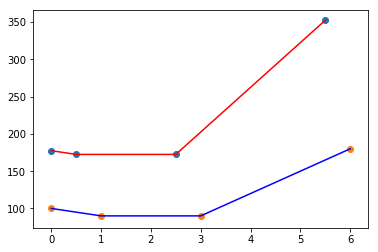

In [12]:
plt.scatter(pos,ans)
plt.plot(pos,ans,'r')        #This one is for bigger K(k1)       
plt.scatter(pos1,ans1)
plt.plot(pos1,ans1,'b')          #This one is for smaller K(k2)

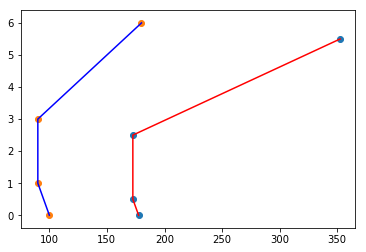

In [13]:
plt.scatter(ans,pos)
plt.plot(ans,pos,'r')        #This one is for bigger K(k1)       
plt.scatter(ans1,pos1)
plt.plot(ans1,pos1,'b')          #This one is for smaller K(k2)